In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

#pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
galaxies = pd.read_csv("data_gama_gal_orient.txt", sep="\s+")

galaxies.describe()

,rmag,rabsmag,redshift,rad,sern,pos,ba
count,113379.000000,113379.000000,113379.000000,113379.000000,113379.000000,113379.000000,113379.000000
mean,18.849054,-20.695499,0.183236,3.377715,2.195855,-0.113890,0.598803
std,0.761111,1.067364,0.068758,1.134358,1.626806,52.259381,0.217319
min,13.752200,-23.627300,0.020004,1.198020,0.012100,-89.998400,0.001900
25%,18.435400,-21.401300,0.131304,2.538515,0.956600,-45.688350,0.430900
50%,19.030700,-20.879700,0.182052,3.129540,1.657800,-0.156400,0.618500
75%,19.445600,-20.153850,0.243140,3.991835,3.041950,45.516700,0.777200
max,19.800000,-15.050800,0.299999,7.298490,9.991900,89.999900,1.000000


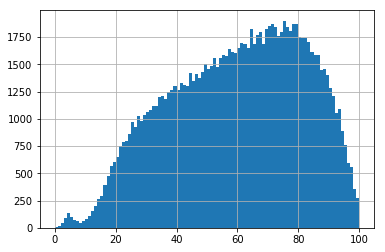

In [3]:
galaxies["baslot"] = galaxies["ba"].multiply(100).astype(int)
galaxies["baslot"].hist(bins=100)

In [4]:
import numpy as np
from sklearn.svm import SVC

def get_train_test(df, y_col, x_cols, ratio):
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
       
    Y_train = df_train[y_col].values
    Y_test = df_test[y_col].values
    X_train = df_train[x_cols].values
    X_test = df_test[x_cols].values
    
    return df_train, df_test, X_train, Y_train, X_test, Y_test

def get_model(rows, ratio=0.8):
    df_train, df_test, X_train, Y_train, X_test, Y_test = get_train_test(
        rows,
        "baslot", ["rmag", "rabsmag", "redshift", "rad", "sern"],
        ratio
    )

    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, Y_train)

    return svm, X_train, Y_train, X_test, Y_test

In [79]:
import time

sample_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # k
run_times = []

for sample_size in sample_sizes:
    start = time.time()
    svm, X_train, Y_train, X_test, Y_test = get_model(galaxies[:sample_size*1000])
    end = time.time()

    run_times.append(end - start)

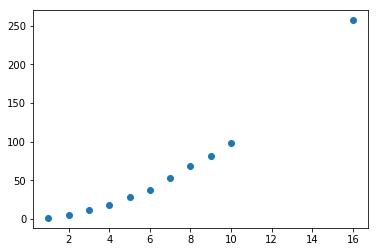

In [86]:
plt.plot(sample_sizes + [16], run_times + [257], 'o')

508.18211584237866

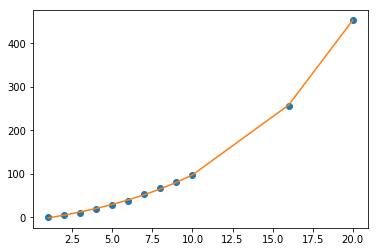

In [134]:
import scipy

x = sample_sizes + [16, 20]
y = run_times + [257, 453]

a = scipy.optimize.curve_fit(lambda t, a, b, c: a + b*np.exp(c*t), x, y)[0]
t = a[0] + a[1] * np.exp(a[2]*np.array(x))

plt.plot(x, y, 'o')
plt.plot(x, t)

(a[0] + a[1] * np.exp(a[2]*113)) / 3600 / 24

In [5]:
import time

start = time.time()
svm, X_train, Y_train, X_test, Y_test = get_model(galaxies[:1000])
end = time.time()

end - start

0.5391600131988525

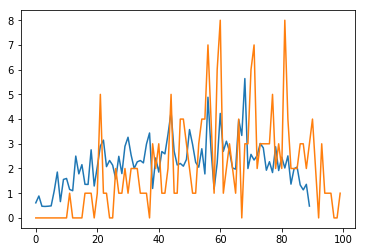

In [6]:
plt.plot(np.sum(svm.predict_proba(X_test), 0))
plt.plot(np.histogram(Y_test, 100, (0, 100))[0])

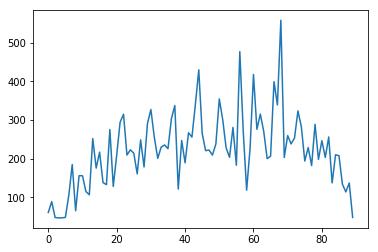

In [7]:
test_set = galaxies[-20000:]
test_set_x = test_set[["rmag", "rabsmag", "redshift", "rad", "sern"]].values

plt.plot(np.sum(svm.predict_proba(test_set_x), 0))